## P3. Normalized model - more epochs

<hr />

Increate the number of epochs (5 marks)

Repeat Part B but use **100 epochs** this time for training.

How does the mean of the mean squared errors compare to that from Step B?

<hr />

### 1.1. Download, load and clean the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# df_concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

df_concrete_data = pd.read_csv("./concrete_data.csv")
df_concrete_data.head(7)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


In [3]:
# Any null value?
df_concrete_data.isnull().sum()

# ... No, good. 

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### 1.2. Split data into predictors and target

In [4]:
## Exclude columns 'Age', 'Strength' for predictors
df_predictors = df_concrete_data[df_concrete_data.columns.difference(['Age', 'Strength'])]

df_target = df_concrete_data['Strength']

### 1.3. Normalizing

In [5]:
df_predictors_norm = (df_predictors - df_predictors.mean()) / df_predictors.std()
df_predictors_norm.head()

,Blast Furnace Slag,Cement,Coarse Aggregate,Fine Aggregate,Fly Ash,Superplasticizer,Water
0,-0.856472,2.476712,0.862735,-1.217079,-0.846733,-0.620147,-0.916319
1,-0.856472,2.476712,1.055651,-1.217079,-0.846733,-0.620147,-0.916319
2,0.795140,0.491187,-0.526262,-2.239829,-0.846733,-1.038638,2.174405
3,0.795140,0.491187,-0.526262,-2.239829,-0.846733,-1.038638,2.174405
4,0.678079,-0.790075,0.070492,0.647569,-0.846733,-1.038638,0.488555


In [6]:
n_cols = df_predictors_norm.shape[1]  # == df_predictors
n_cols # number of predictors

7

### 1.4. Build model with keras

In [7]:
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
## Define regression model as a python function (which we can re-use later)

def regression_model(n_cols, nodes_per_hlayer=[10,], opt='adam', loss='mean_squared_error'):
    ## 1 - Create model
    model = Sequential()
    for ix, num_nodes in enumerate(nodes_per_hlayer):
      if ix == 0: # first layer
        model.add(Dense(num_nodes, activation='relu', input_shape=(n_cols,)))
      else:
        model.add(Dense(num_nodes, activation='relu'))
    model.add(Dense(1)) # output layer
    
    ## 2 - Compile model
    model.compile(optimizer=opt, loss=loss, metrics=[loss])
    return model

In [9]:
from sklearn.model_selection import train_test_split

## Define train/test split wrapper function 

def split_data(df_pred, df_target, test_size=0.3, random_state=6776):
  X_train, X_test, y_train, y_test = train_test_split(df_pred, df_target, 
                                                      test_size=test_size, 
                                                      random_state=random_state)
  return (X_train, X_test, y_train, y_test) # tuple

### 1.5. Instanciate the model

In [10]:
## as per spec n_cols input, 10 nodes in only 1 layer (array of length 1)
model = regression_model(n_cols, nodes_per_hlayer=[10])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


### 1.6. Train and evaluate the model

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
## Main Train/Eval loop - 50 iterations

N = 50
mse_ary = []

for ix in range(0, N): 
  ## Reset model
  model = regression_model(n_cols, nodes_per_hlayer=[10])
  
  ## Split the data into train and test set using opur wrapper function
  X_train, X_test, y_train, y_test = split_data(df_predictors_norm, df_target)

  ## Fit the model - No train/validation split
  _history = model.fit(X_train, y_train, 
                       epochs=100,  # <--- 100 epochs 
                       verbose=0)
    
  ## Make Predictions
  pred = model.predict(X_test)
  
  ## Compare to ground truth
  mse = mean_squared_error(y_test, pred)
  print("Iteration: {:2d} / MSE: {:1.5f}".format(ix, mse))
  
  ## Keep it for later
  mse_ary.append(mse)

W0322 11:46:56.934609 140436683749184 deprecation_wrapper.py:119] From /home/pascal/Projects/ML_DL/anaconda3/envs/tensorflow_keras_gpuenv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Iteration:  0 / MSE: 207.05974
Iteration:  1 / MSE: 224.74386
Iteration:  2 / MSE: 206.38742
Iteration:  3 / MSE: 229.62057
Iteration:  4 / MSE: 208.31938
Iteration:  5 / MSE: 212.22085
Iteration:  6 / MSE: 217.86804
Iteration:  7 / MSE: 228.25356
Iteration:  8 / MSE: 234.14931
Iteration:  9 / MSE: 219.09961
Iteration: 10 / MSE: 222.61764
Iteration: 11 / MSE: 215.53500
Iteration: 12 / MSE: 204.55305
Iteration: 13 / MSE: 213.08729
Iteration: 14 / MSE: 225.58184
Iteration: 15 / MSE: 205.59929
Iteration: 16 / MSE: 228.68396
Iteration: 17 / MSE: 208.86463
Iteration: 18 / MSE: 199.45614
Iteration: 19 / MSE: 215.20687
Iteration: 20 / MSE: 209.20791
Iteration: 21 / MSE: 219.00924
Iteration: 22 / MSE: 216.35133
Iteration: 23 / MSE: 205.75799
Iteration: 24 / MSE: 218.03700
Iteration: 25 / MSE: 201.54907
Iteration: 26 / MSE: 220.09426
Iteration: 27 / MSE: 222.94512
Iteration: 28 / MSE: 229.21266
Iteration: 29 / MSE: 243.92618
Iteration: 30 / MSE: 207.07906
Iteration: 31 / MSE: 215.36914
Iteratio

In [13]:
## Summary

print("Summary baseline model: ")
np_ary = np.array(mse_ary, dtype=np.float64)

## NOTE: using unbiased std - which means diving by N-1 (where N is the size of sample here 50)
##       just in case, added biased std.
print("mean(MSE): {:2.5f} / unbiased std(MSE): {:2.5f} / biased std(MSE): {:2.5f}"\
      .format(np.mean(np_ary), np.std(np_ary, ddof=1), np.std(np_ary, ddof=0)))

Summary baseline model: 
mean(MSE): 219.00436 / unbiased std(MSE): 14.50810 / biased std(MSE): 14.36228


#### Remarks

- More iterations does improve significantly both the mean of MSE and (reduce) the spread (standard deviation) compare to both previous normalized model (with 50 epochs) and the baseline model.


#### Optional

In [14]:
ix_max = np_ary.argmax()
ix_min = np_ary.argmin()

print("max: {:2.5f} at epoch: {:2d} / min: {:2.5f} at epoch: {:2d}"\
      .format(np_ary[ix_max], ix_max, np_ary[ix_min], ix_min))

max: 284.95623 at epoch: 36 / min: 199.45614 at epoch: 18


In [15]:
df_ = pd.read_csv("./02_norm_model.csv")

df_['mse_03_norm100ep'] = np_ary
df_.to_csv('03_norm_100epoch_model.csv', sep=',', encoding='utf-8', index=False)

In [16]:
df_.head()

,mse_01_bl,mse_02_norm,mse_03_norm100ep
0,208.949511,355.939247,207.059742
1,210.507436,512.653717,224.743865
2,190.812754,416.278048,206.387416
3,206.248697,530.620247,229.620568
4,189.519537,369.478724,208.319380


In [17]:
df_.describe()

,mse_01_bl,mse_02_norm,mse_03_norm100ep
count,50.000000,50.000000,50.000000
mean,424.129761,420.368508,219.004359
std,415.684991,121.693519,14.508099
min,179.674799,284.245219,199.456141
25%,189.380645,347.151831,208.777980
50%,225.632202,371.295692,217.111800
75%,462.052733,465.697787,224.327356
max,2164.597530,838.861597,284.956233


Text(0, 0.5, 'MSE')

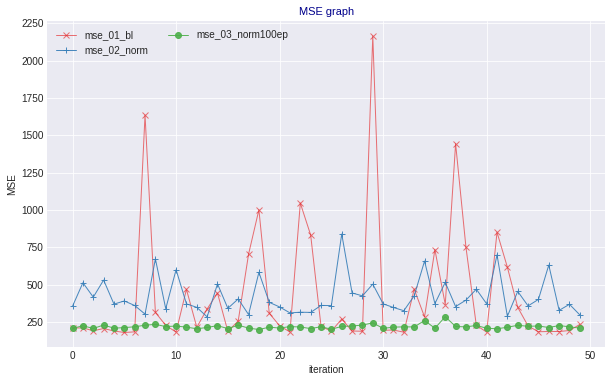

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 6))

# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
ixes = list(range(0, df_.shape[0]))

alpha =0.6
mark=['x', '+', 'o']
for ix, col in enumerate(df_):
  plt.plot(ixes, df_[col], marker=mark[ix], color=palette(ix), linewidth=1, alpha=alpha, 
              label=df_.columns[ix])
  alpha=0.9

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("MSE graph", loc='center', fontsize=11, fontweight=0, color='darkblue')
plt.xlabel("iteration")
plt.ylabel("MSE")